In [12]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.basemap import Basemap
import xarray as xr
import math
import time
import random
from skimage.morphology import binary_erosion
import matplotlib.colors as mcolors
import os, sys
from rrtstar_netcdf import RRTStar
from rrt_netcdf import RRT

show_animation = False

In [2]:
data = xr.open_dataset('med-hcmr-wav-an-fc-h_1637573239403.nc')  # wave height 22 november
data_stat = xr.open_dataset('MED-MFC_006_017_mask_bathy.nc')
lats = data.variables['latitude'][:]
lons = data.variables['longitude'][:]
time = data.variables['time'][:]
wave = data.variables['VHM0'][:]
mask = data_stat.variables['mask'][0,:,:]
print(data)
print("------------------------------------------------------")
print(wave[0])

<xarray.Dataset>
Dimensions:    (latitude: 380, time: 24, longitude: 1307)
Coordinates:
  * latitude   (latitude) float32 30.19 30.23 30.27 30.31 ... 45.9 45.94 45.98
  * time       (time) datetime64[ns] 2021-11-22 ... 2021-11-22T23:00:00
  * longitude  (longitude) float32 -18.12 -18.08 -18.04 ... 36.21 36.25 36.29
Data variables:
    VHM0       (time, latitude, longitude) float32 ...
Attributes: (12/15)
    bulletin_type:                   forecast
    institution:                     Hellenic Centre for Marine Research (HCM...
    source:                          MEDWAM3
    credit:                          Copernicus Marine Environment Monitoring...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    producer:                        CMEMS-MED Monitoring and Forecasting Centre
    ...                              ...
    area:                            MED
    bulletin_date:                   2021-11-21 12
    FROM_ORIGINAL_FILE__field_type:  hourly_instanta

<ipython-input-3-050bc91c3fc0>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, wave[0], cmap='jet')


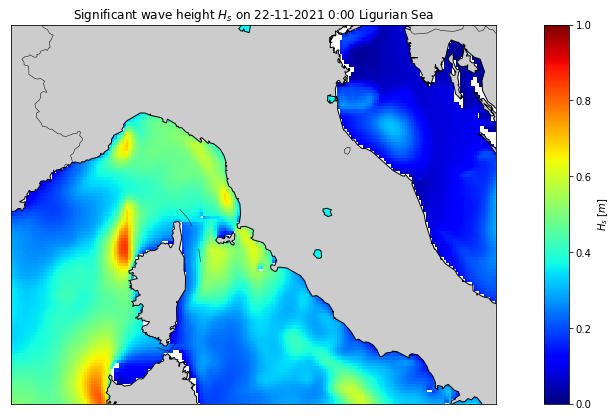

In [3]:
plt.figure(1, figsize=(10, 7))
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i')
             
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

c_scheme = mp.pcolor(x, y, wave[0], cmap='jet')
mp.fillcontinents(lake_color='aqua')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme, location='right', pad='10%')
plt.clim(0, 1)
cbar.set_label('$H_s$ $[m]$')

plt.title('Significant wave height $H_s$ on 22-11-2021 0:00 Ligurian Sea')
plt.show()

<ipython-input-4-b0606b4c8252>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mp.pcolor(x, y, contour_raw_meteo[0], cmap=ListedColormap(['white', 'red']))
<ipython-input-4-b0606b4c8252>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mp.pcolor(x, y, contour_raw_meteo[1], cmap=ListedColormap(['white', 'red']))
<ipython-input-4-b0606b4c8252>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3

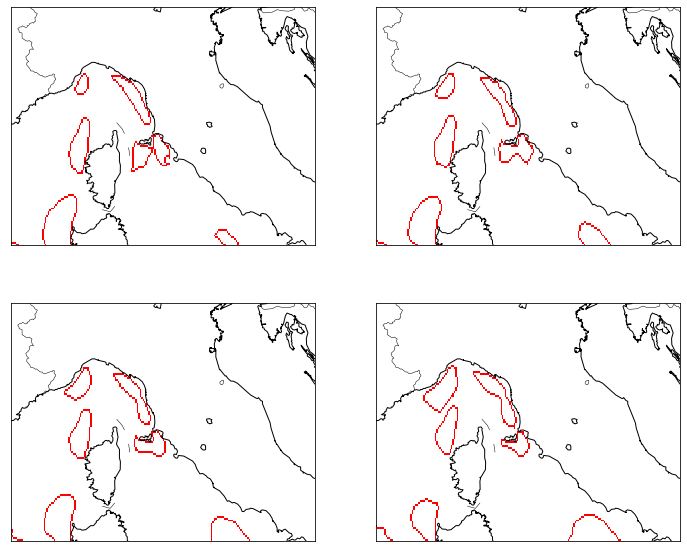

In [4]:
l = 5 
cost = np.zeros_like(wave[:l])
contour_raw_meteo = np.zeros_like(wave[:l])
contour_raw_land = np.logical_xor(mask,binary_erosion(mask)) 
for i in range(l):
    cost[i] = 100 * (np.array(wave[i]) >0.5)
    contour_raw_meteo[i]=np.logical_xor(cost[i],binary_erosion(cost[i]))
    
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[0][0])
#c_scheme = mp.pcolor(x, y, cost[0], cmap=ListedColormap(['white', 'red']))
mp.pcolor(x, y, contour_raw_meteo[0], cmap=ListedColormap(['white', 'red']))
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[0][1])
mp.pcolor(x, y, contour_raw_meteo[1], cmap=ListedColormap(['white', 'red']))
#c_scheme1 = mp.pcolor(x, y, cost[1], cmap=ListedColormap(['white', 'red']))
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[1][0])

#c_scheme1 = mp.pcolor(x, y, cost[2], cmap=ListedColormap(['white', 'red']))
mp.pcolor(x, y, contour_raw_meteo[2], cmap=ListedColormap(['white', 'red']))
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[1][1])
mp.pcolor(x, y, contour_raw_meteo[3], cmap=ListedColormap(['white', 'red']))
#c_scheme1 = mp.pcolor(x, y, cost[3], cmap=ListedColormap(['white', 'red']))
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

plt.show()

In [5]:
x_min, y_min = mp(8.958334, 41.354168)    # lons.values[650], lats.values[268]
x_max, y_max = mp(11.500001, 43.270832)   # lons.values[711], lats.values[314]
print("The area of movement is:")
print("x_min = {}, y_min = {}\nx_max = {}, y_max = {}".format(x_min, y_min, x_max, y_max))

sx, sy = mp(9.42857, 43.11295)
gx, gy = mp(11.300001, 42.270832)
print("START is at ({},{}), GOAL is at ({},{})".format(sx, sy, gx, gy))
Cspacex, Cspacey = [], []   # all configuration space points
oxmeteo, oymeteo = [[] for i in range(l)], [[] for i in range(l)]    # all meteo points
x_obsm, y_obsm = [[] for i in range(l)], [[] for i in range(l)]     # contour meteo points


The area of movement is:
x_min = 282249.730022532, y_min = 114007.03369052801
x_max = 564870.0725610546, y_max = 402247.96147155575
START is at (334537.5629266633,378168.2533945432), GOAL is at (542631.0977041185,250766.70724292006)


In [6]:
for i in range(l):
    for k in np.arange(0,380,1):
        for j in np.arange(0,1307,1):
            if lons.values[650] <= lons.values[j] <= lons.values[711] and lats.values[268] <= lats.values[k] <= lats.values[314]: 
                if cost[i][k][j] == 100:
                    oxmeteo[i].append(lons.values[j])
                    oymeteo[i].append(lats.values[k])
                if contour_raw_meteo[i][k][j]:
                    x_obsm[i].append(lons.values[j])
                    y_obsm[i].append(lats.values[k])
    # mapping to basemap mp
    oxmeteo_[i], oymeteo_[i] = mp(oxmeteo[i], oymeteo[i])   # meteo points
    x_obsm_[i], y_obsm_[i] = mp(x_obsm[i], y_obsm[i])       # meteo contour points
for k in np.arange(0,380,1):
        for j in np.arange(0,1307,1):
            if lons.values[650] <= lons.values[j] <= lons.values[711] and lats.values[268] <= lats.values[k] <= lats.values[314]:                      
                if contour_raw_land[k][j]: 
                    x_obsl.append(lons.values[j])
                    y_obsl.append(lats.values[k])
                if mask.values[k][j] == 0:
                    oxland.append(lons.values[j])
                    oyland.append(lats.values[k])
                if mask.values[k][j] == 1:
                    Cspacex.append(lons.values[j])
                    Cspacey.append(lats.values[k])

Cspacex_, Cspacey_ = mp(Cspacex, Cspacey)
x_obsl_, y_obsl_ = mp(x_obsl, y_obsl)       # coastline points
oxland_, oyland_ = mp(oxland, oyland)       # land points


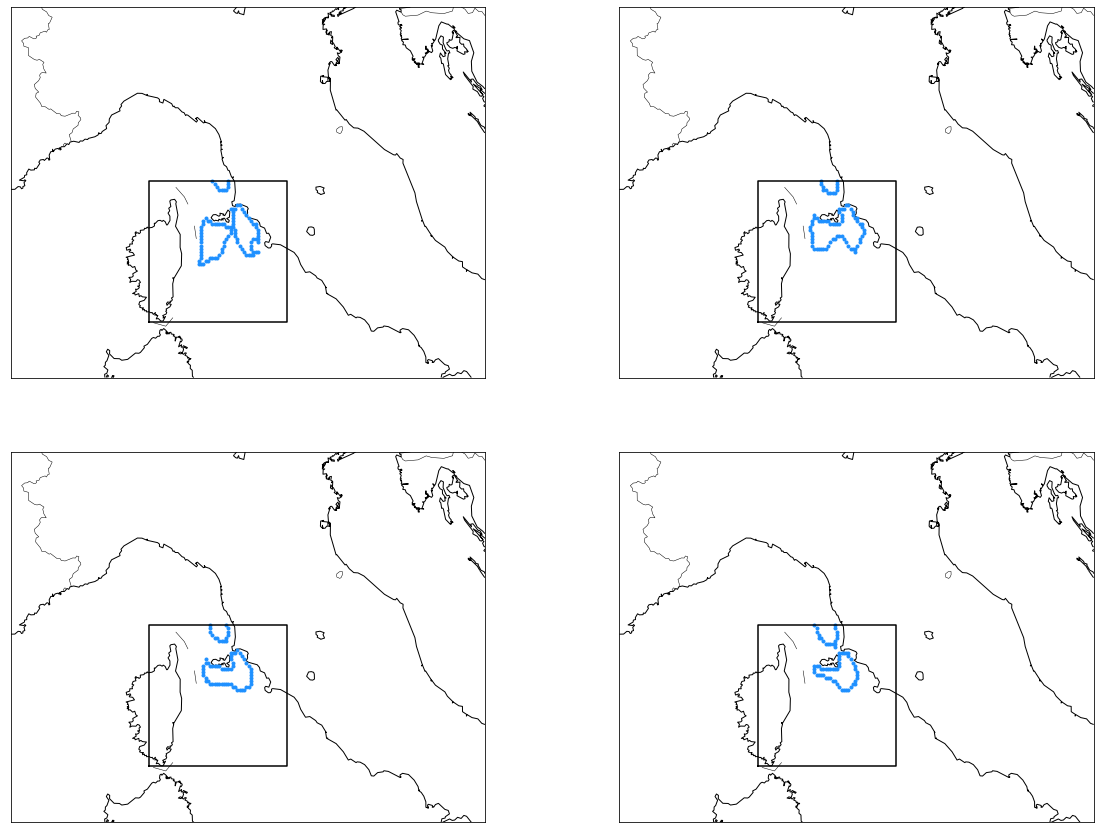

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[0][0])
#mp.plot(oxmeteo_[0], oymeteo_[0], ".", color="dodgerblue")
mp.plot(x_obsm_[0], y_obsm_[0], ".", color="dodgerblue")
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[0][1])
#mp.plot(oxmeteo_[1], oymeteo_[1], ".", color="dodgerblue")
mp.plot(x_obsm_[1], y_obsm_[1], ".", color="dodgerblue")
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[1][0])
#mp.plot(oxmeteo_[2], oymeteo_[2], ".", color="dodgerblue")
mp.plot(x_obsm_[2], y_obsm_[2], ".", color="dodgerblue")
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[1][1])
#mp.plot(oxmeteo_[3], oymeteo_[3], ".", color="dodgerblue")
mp.plot(x_obsm_[3], y_obsm_[3], ".", color="dodgerblue")
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

plt.show()

In [8]:
# def create_maps(wave, cost, contour_meteo, lons, lats, oxmeteo, 
#                 oymeteo, oxmeteo_, oymeteo_, x_obsm, y_obsm, x_obsm_, y_obsm_):
#     cost = 100 * (np.array(wave) >0.5)
#     contour_raw_meteo=np.logical_xor(cost, binary_erosion(cost))
#     for k in np.arange(0,380,1):
#         for j in np.arange(0,1307,1):
#             if lons.values[650] <= lons.values[j] <= lons.values[711] and lats.values[268] <= lats.values[k] <= lats.values[314]: 
#                 if cost[k][j] == 100:
#                     oxmeteo.append(lons.values[j])
#                     oymeteo.append(lats.values[k])
#                 if contour_raw_meteo[k][j]:
#                     x_obsm.append(lons.values[j])
#                     y_obsm.append(lats.values[k])
#     # mapping to basemap mp
#     oxmeteo_, oymeteo_ = mp(oxmeteo, oymeteo)   # meteo points
#     x_obsm_, y_obsm_ = mp(x_obsm, y_obsm)       # meteo contour points"""
    
#     return oxmeteo_, oymeteo_, x_obsm_, y_obsm_

In [ ]:
scenario = input('Press a number between 1 and 3 \n')
print("Scenario " + scenario + " has been pressed")

In [8]:
obstacle_list = [[] for i in range(l)]

for i in range(l):
    for j, _ in enumerate(x_obsm_[i]):
        obstacle_list[i].append([x_obsm_[i][j], y_obsm_[i][j], 5000])

#obstacle_list[0]

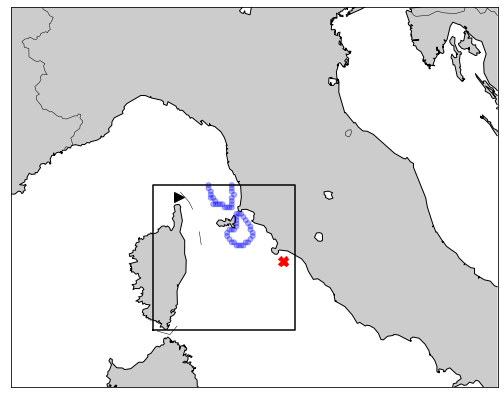

In [9]:
# %matplotlib
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
mp.fillcontinents()
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
for j in range(len(obstacle_list[4])):
    line = ax.add_patch(plt.Circle(xy=(obstacle_list[4][j][0], obstacle_list[4][j][1]), radius=obstacle_list[4][j][2],
                            color='b', alpha=0.3))
plt.show()

In [10]:
rrt = RRT(
        start=[sx, sy],
        goal=[gx, gy],
        rand_area=[x_min, x_max, y_min, y_max],
        c_spacex = Cspacex_,
        c_spacey = Cspacey_,
        obstacle_list=obstacle_list,
        expand_dis=5000,
        speed = 2,  # [m/s]
        path_resolution=2500,  # changing path resolution reduces a lot the computation time
        goal_sample_rate=10) 

In [ ]:
import time
start_time = time.time()
path_rrt, distance = rrt.planning(animation=show_animation)
end_time = time.time()
if path_rrt is None:
    print("Cannot find path")
else:
    print("Found path!!")
print("The computational time is " + str(round(end_time - start_time, 4)) + " seconds")

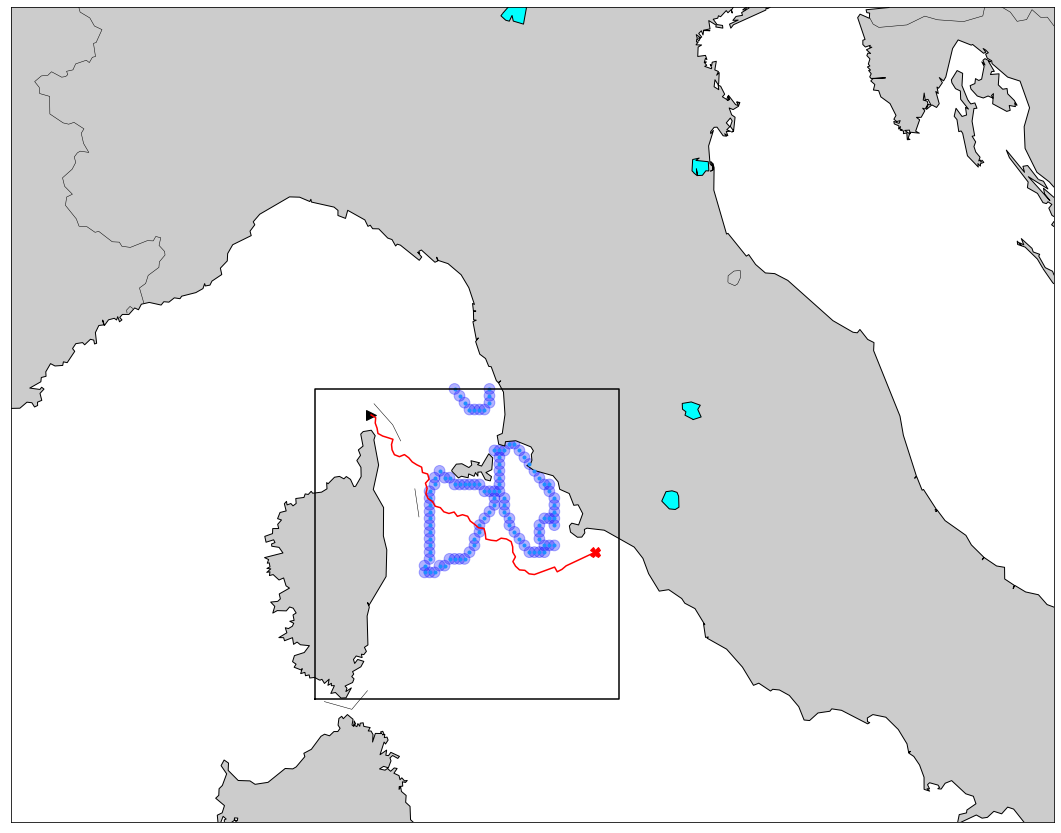

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
plt.plot(x_obsm_[0], y_obsm_[0], ".", color='dodgerblue')
for i in range(len(obstacle_list[0])):
    ax.add_patch(plt.Circle(xy=(obstacle_list[0][i][0], obstacle_list[0][i][1]), radius=obstacle_list[0][i][2],
                            color='b', alpha=0.3))
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot([x for (x, y) in path_rrt], [y for (x, y) in path_rrt], '-r')
mp.fillcontinents(lake_color='aqua')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
#plt.plot([sx, gx], [sy, gy])
plt.savefig('rrt_mapchang.png', dpi=300)
plt.show()

In [19]:
math.hypot(gx-sx, gy-sy)

243996.0515623154

In [20]:
import geopy.distance
a = (9.45289482921223, 43.08533583676428)
b = (9.42857, 43.112950000000005)
print(geopy.distance.distance(a, b).km)

4.05404252815348


In [21]:
rrt_star = RRTStar(
            start=[sx, sy],
            goal=[gx, gy],
            rand_area=[x_min, x_max, y_min, y_max],
            obstacle_list=obstacle_list,
            c_spacex = Cspacex_,
            c_spacey = Cspacey_,
            speed = 2,
            path_resolution=2500.0,
            connect_circle_dist=100000.0,
            goal_sample_rate=15,
            expand_dis=5000)

In [22]:
import time
#%matplotlib inline
start_time = time.time()
path_star, cost_tot, iter_tot = rrt_star.planning(animation=show_animation)
end_time = time.time()
if path_star is None:
    print("Cannot find path")
else:
    print("Found path!!")

print("The computational time is " + str(round(end_time - start_time, 4)) + " seconds")

Found path!!
The computational time is 1.5649 seconds


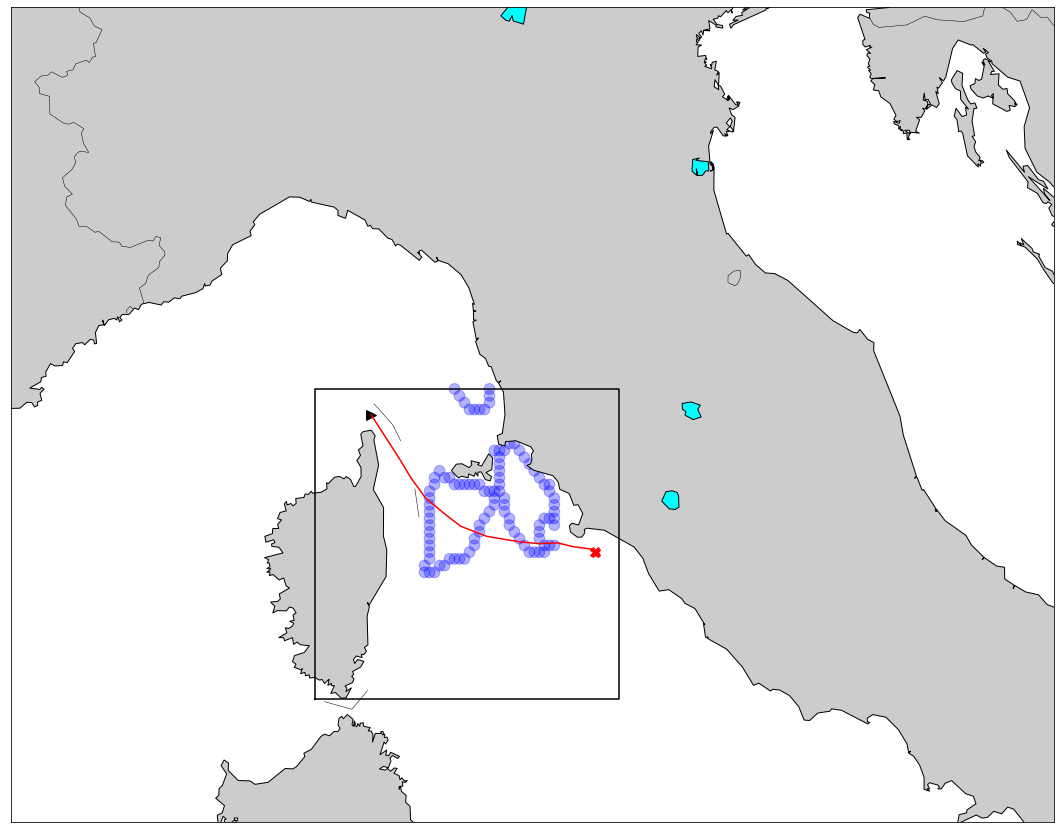

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i')
plt.plot(sx, sy, ">k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
for i in range(len(obstacle_list[0])):
    ax.add_patch(plt.Circle(xy=(obstacle_list[0][i][0], obstacle_list[0][i][1]), radius=obstacle_list[0][i][2],
                            color='b', alpha=0.3))
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot([x for (x, y) in path_star], [y for (x, y) in path_star], '-r')
mp.fillcontinents(lake_color='aqua')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
plt.savefig('rrt_star_mapchang.png', dpi=300)
plt.show()

In [25]:
print("The distance to the mission area is " + str(round(cost_tot/1000, 2)) + " km")
sx, sy = mp(9.42857, 43.11295)
gx, gy = mp(11.300001, 42.270832)
print(math.hypot(gx-sx, gy-sy))
import geopy.distance

a = (9.42857, 43.11295)
b = (11.300001, 42.270832)
print(geopy.distance.distance(a, b).m)
# from haversine import Unit
# hs.haversine(a,b, unit=Unit.METERS)

The distance to the mission area is 259.64 km
243996.0515623154
226612.81050045145
